# Mercedes Used Car Analysis

Original : [Bill Cruise](https://www.kaggle.com/bcruise/mercedes-used-car-analysis)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('merc.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


## Initial data exploration

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
categorical_columns = ['model', 'transmission', 'fuelType']
df[categorical_columns].describe()

,model,transmission,fuelType
count,13119,13119,13119
unique,27,4,4
top,C Class,Semi-Auto,Diesel
freq,3747,6848,9187


## Model list

In [6]:
df['model'].unique()

array([' SLK', ' S Class', ' SL CLASS', ' G Class', ' GLE Class',
       ' GLA Class', ' A Class', ' B Class', ' GLC Class', ' C Class',
       ' E Class', ' GL Class', ' CLS Class', ' CLC Class', ' CLA Class',
       ' V Class', ' M Class', ' CL Class', ' GLS Class', ' GLB Class',
       ' X-CLASS', '180', ' CLK', ' R Class', '230', '220', '200'],
      dtype=object)

In [7]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [8]:
df['fuelType'].unique()

array(['Petrol', 'Hybrid', 'Diesel', 'Other'], dtype=object)

In [9]:
numeric_columns = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
df_numeric = df[numeric_columns]

In [10]:
df_numeric.head()

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0


In [11]:
corr = df_numeric.corr()

In [12]:
corr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


<AxesSubplot:>

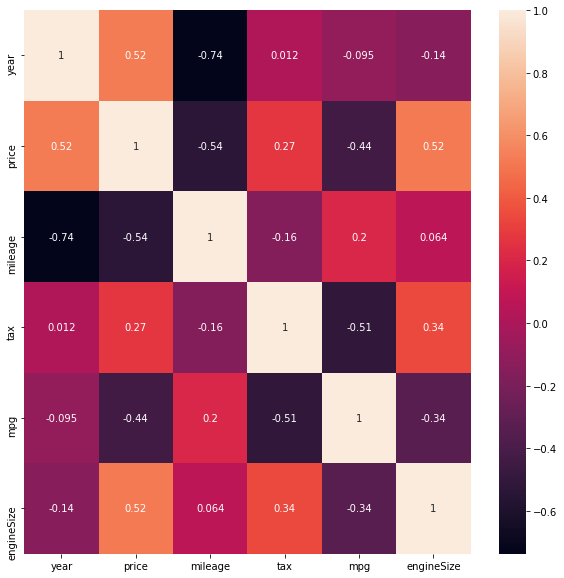

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

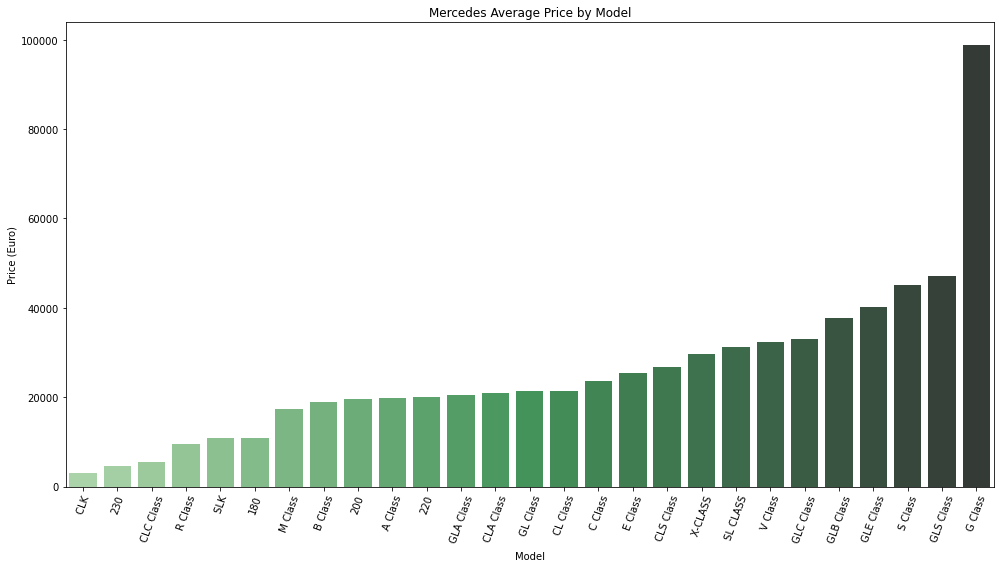

In [15]:
model_price = df.groupby('model')['price'].mean().sort_values()

plt.figure(figsize=(14,8))
plt.title("Mercedes Average Price by Model")
pallete = sns.color_palette("Greens_d", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pallete)

plt.xlabel("Model")
plt.xticks(rotation=70)
plt.ylabel("Price (Euro)")
plt.tight_layout()

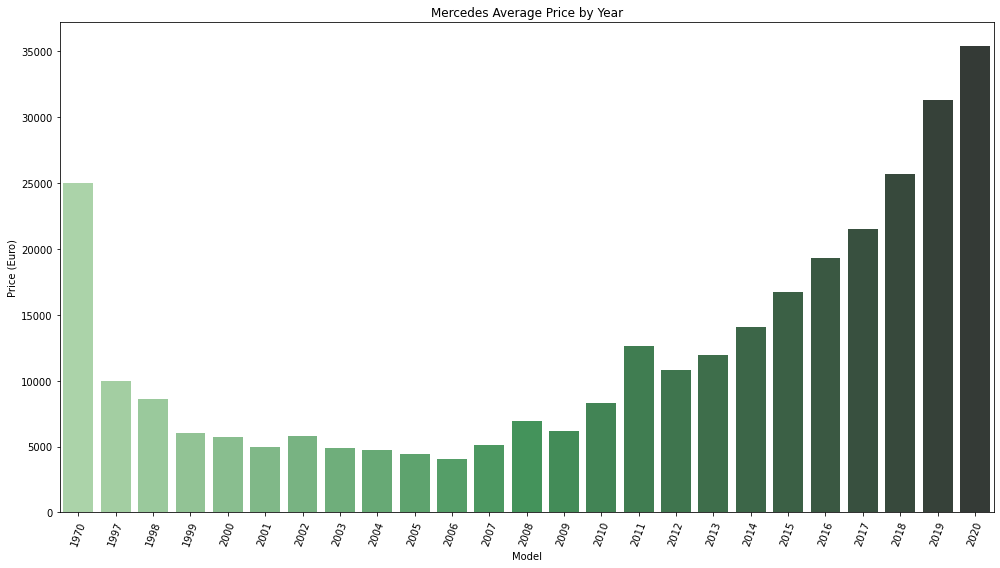

In [16]:
model_price = df.groupby('year')['price'].mean().sort_values()

plt.figure(figsize=(14,8))
plt.title("Mercedes Average Price by Year")
pallete = sns.color_palette("Greens_d", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pallete)

plt.xlabel("Model")
plt.xticks(rotation=70)
plt.ylabel("Price (Euro)")
plt.tight_layout()

<AxesSubplot:xlabel='year', ylabel='price'>

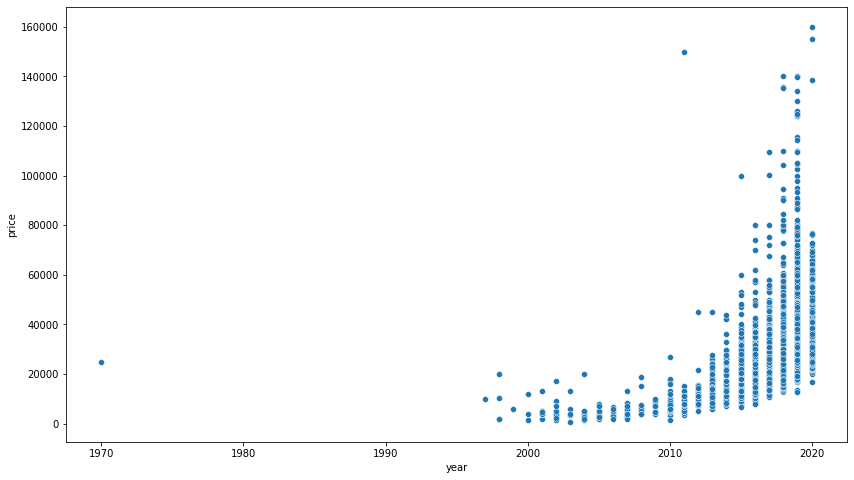

In [17]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_numeric['year'], y=df_numeric['price'])

<AxesSubplot:xlabel='engineSize', ylabel='price'>

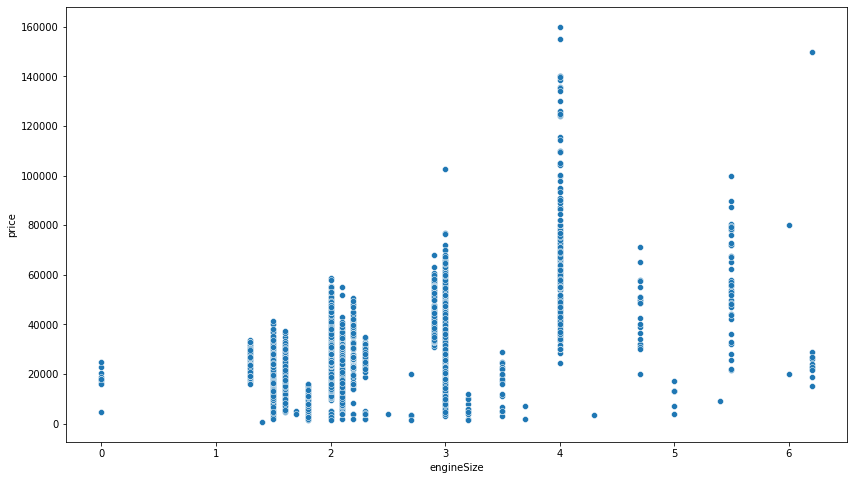

In [18]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_numeric['engineSize'], y=df_numeric['price'])

<AxesSubplot:xlabel='mileage', ylabel='price'>

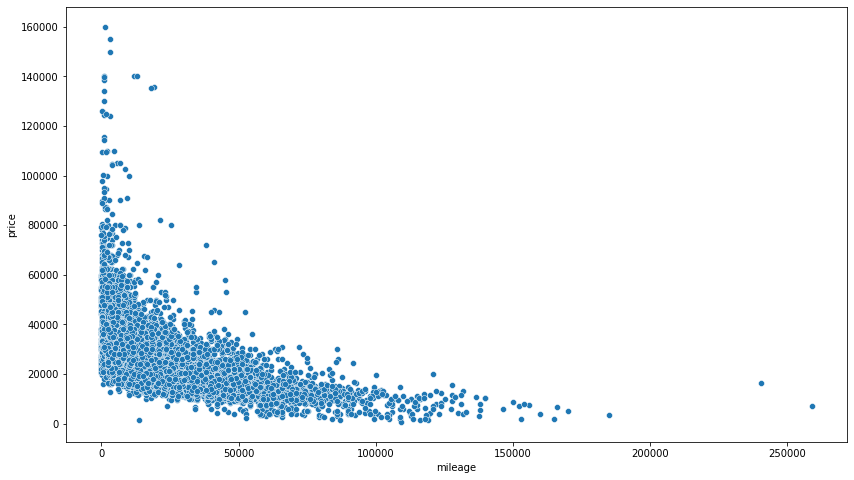

In [19]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_numeric['mileage'], y=df_numeric['price'])

<AxesSubplot:xlabel='mpg', ylabel='price'>

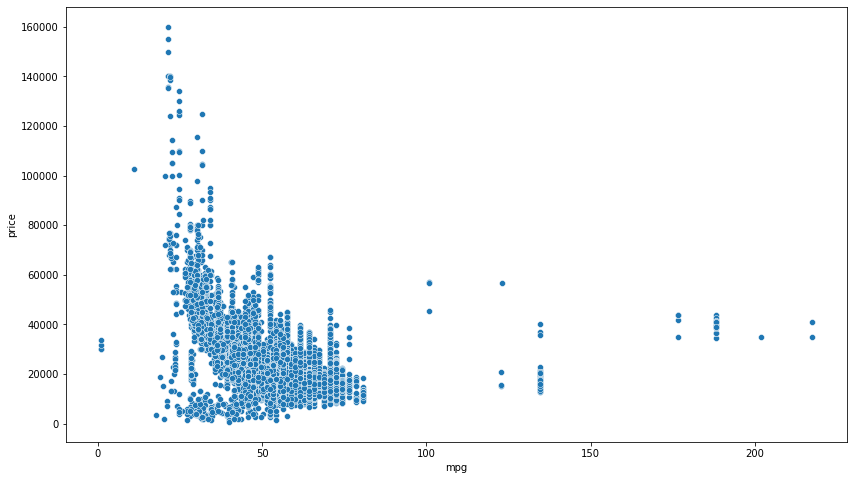

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=df_numeric['mpg'], y=df_numeric['price'])

<AxesSubplot:ylabel='fuelType'>

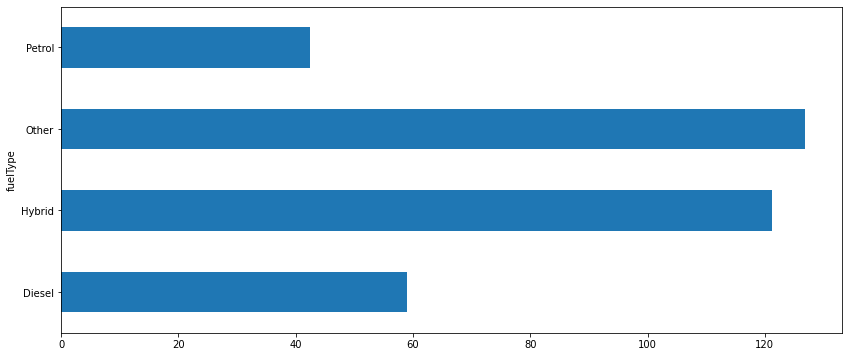

In [21]:
plt.figure(figsize=(14,6))
df.groupby("fuelType")['mpg'].mean().plot.barh()

## Encoding categorical features

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_encoder = OrdinalEncoder()
df['model'] = ordinal_encoder.fit_transform(df[['model']])

In [23]:
OH_encoder = OneHotEncoder(sparse=False)
oh_cols = pd.DataFrame(OH_encoder.fit_transform(df[['transmission', 'fuelType']]))
oh_cols
oh_cols.columns = ['trans_0', 'trans_1', 'trans_2', 'trans_3', 'fuel_0', 'fuel_1', 'fuel_2', 'fuel_3']

df = df.drop(['transmission', 'fuelType'], axis=1)
df = pd.concat([df, oh_cols], axis=1)
df

,model,year,price,mileage,tax,mpg,engineSize,trans_0,trans_1,trans_2,trans_3,fuel_0,fuel_1,fuel_2,fuel_3
0,20.0,2005,5200,63000,325,32.1,1.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,18.0,2017,34948,27000,20,61.4,2.1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,19.0,2016,49948,6200,555,28.0,5.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9.0,2016,61948,16000,325,30.4,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,2016,73948,4000,325,30.1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2.0,2020,35999,500,145,55.4,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13115,1.0,2020,24699,2500,145,55.4,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13116,13.0,2019,30999,11612,145,41.5,2.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13117,7.0,2019,37990,2426,145,45.6,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Train simple random forest model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

model = RandomForestRegressor(n_estimators=10, random_state=21)
model.fit(X_train, y_train)
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
mae

1606.8154627134568

[Text(0.5, 1.0, 'Price vs Predictions')]

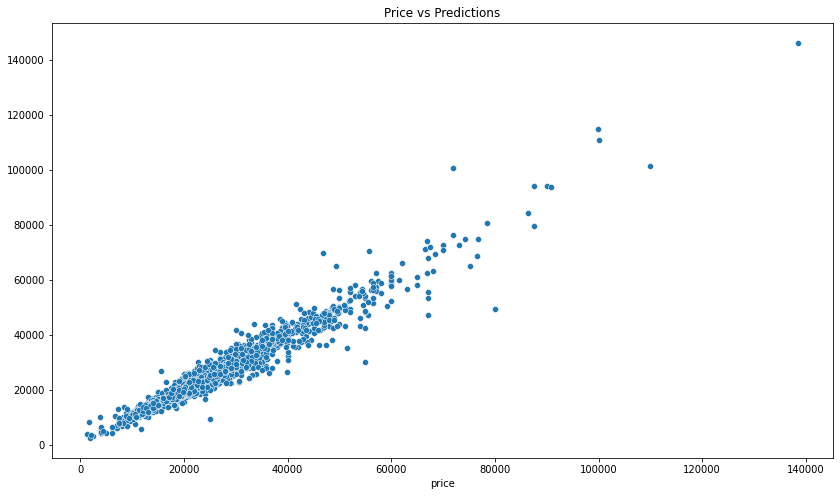

In [25]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=y_test, y=preds).set(title="Price vs Predictions")